In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
pd.set_option("display.max_columns", 500)
%matplotlib notebook

In [3]:
df = pd.read_csv("data/all_players_gamelog.csv", parse_dates=['GAME_DATE'], index_col=0)
df['WL'] = (df.WL == 'W').astype(int)
df[['FG_PCT', 'FG3_PCT', 'FT_PCT']] = df[['FG_PCT', 'FG3_PCT', 'FT_PCT']].fillna(0)
df.describe()

,SEASON_ID,PLAYER_ID,TEAM_ID,GAME_ID,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,opp_team_id
count,281855.000000,2.818550e+05,2.818550e+05,2.818550e+05,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281853.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,281855.000000,2.818550e+05
mean,22012.206035,2.267697e+05,1.610613e+09,2.122120e+07,0.500562,23.274137,3.639833,7.989338,0.418996,0.742846,2.078689,0.198461,1.715868,2.258115,0.435337,1.037133,3.059406,4.096568,2.111834,0.728598,0.468638,1.318799,1.964716,9.738380,0.000639,1.610613e+09
std,3.261275,3.825756e+05,8.669016e+00,3.261129e+05,0.500001,11.072128,3.005858,5.588915,0.248469,1.182727,2.446144,0.290176,2.323877,2.845378,0.428757,1.416717,2.697434,3.518020,2.499278,0.979084,0.867389,1.392620,1.476685,7.956941,10.598552,8.650495e+00
min,22007.000000,1.500000e+01,1.610613e+09,2.070000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-57.000000,1.610613e+09
25%,22009.000000,2.617000e+03,1.610613e+09,2.090104e+07,0.000000,15.000000,1.000000,4.000000,0.273000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.000000,1.610613e+09
50%,22012.000000,2.011870e+05,1.610613e+09,2.120098e+07,1.000000,24.000000,3.000000,7.000000,0.429000,0.000000,1.000000,0.000000,1.000000,2.000000,0.500000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,1.610613e+09
75%,22015.000000,2.026950e+05,1.610613e+09,2.150064e+07,1.000000,32.000000,5.000000,11.000000,0.571000,1.000000,3.000000,0.375000,3.000000,4.000000,0.917000,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,14.000000,6.000000,1.610613e+09
max,22018.000000,1.629234e+06,1.610613e+09,2.180028e+07,1.000000,60.000000,24.000000,50.000000,1.000000,14.000000,24.000000,1.000000,25.000000,39.000000,1.000000,18.000000,23.000000,31.000000,25.000000,10.000000,12.000000,12.000000,6.000000,70.000000,57.000000,1.610613e+09


In [4]:
team_games = pd.read_csv("data/all_games.csv", parse_dates=["GAME_DATE"], index_col=0)
team_games['WL'] = (team_games.WL == 'W').astype(int)
team_games[['FG_PCT', 'FG3_PCT', 'FT_PCT']] = team_games[['FG_PCT', 'FG3_PCT', 'FT_PCT']].fillna(0)
team_games.describe()

,SEASON_ID,TEAM_ID,GAME_ID,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,22011.539200,1.610613e+09,2.115453e+07,0.499633,241.678333,37.674267,82.647367,0.456894,7.558000,21.142433,0.354463,17.988067,23.700067,0.759475,10.80320,31.592067,42.395267,21.863467,7.539033,4.840867,14.375367,20.573967,100.894600,0.000000,0.516667
std,3.615646,8.654469e+00,3.615377e+05,0.500008,8.600814,5.164067,7.639609,0.056084,3.534749,7.346628,0.111534,6.192453,7.625242,0.102209,3.89886,5.400484,6.541013,5.125879,2.903588,2.554439,3.907374,4.405675,12.517129,13.599143,0.522683
min,22005.000000,1.610613e+09,2.050103e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-61.000000,0.000000
25%,22008.000000,1.610613e+09,2.080109e+07,0.000000,240.000000,34.000000,78.000000,0.419000,5.000000,16.000000,0.280000,14.000000,18.000000,0.696000,8.00000,28.000000,38.000000,18.000000,5.000000,3.000000,12.000000,18.000000,92.000000,-9.000000,0.000000
50%,22012.000000,1.610613e+09,2.120016e+07,0.000000,240.000000,38.000000,82.000000,0.456000,7.000000,20.000000,0.353000,18.000000,23.000000,0.765000,11.00000,31.000000,42.000000,22.000000,7.000000,5.000000,14.000000,20.000000,101.000000,0.000000,1.000000
75%,22015.000000,1.610613e+09,2.150022e+07,1.000000,240.000000,41.000000,87.000000,0.494000,10.000000,26.000000,0.429000,22.000000,28.000000,0.833000,13.00000,35.000000,47.000000,25.000000,9.000000,6.000000,17.000000,23.000000,109.000000,9.000000,1.000000
max,22018.000000,1.610613e+09,2.180028e+07,1.000000,340.000000,63.000000,129.000000,0.684000,25.000000,61.000000,1.000000,52.000000,64.000000,1.000000,38.00000,56.000000,81.000000,47.000000,22.000000,19.000000,31.000000,42.000000,168.000000,61.000000,2.000000


In [5]:
stat_cols = ["WL", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT", "FTM", "FTA", "FT_PCT",
            "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "PLUS_MINUS"]

def map_cols(col):
    return "l5mean_{}".format(col.lower())

In [6]:
df.sort_values(by='GAME_DATE', ascending=True, inplace=True)
grp = df.groupby(['PLAYER_ID', 'SEASON_ID'])
hist_stats = grp[stat_cols].transform(lambda x: x.shift(1).rolling(5).mean()).rename(columns=map_cols)
hist_stats.describe()

,l5mean_wl,l5mean_min,l5mean_fgm,l5mean_fga,l5mean_fg_pct,l5mean_fg3m,l5mean_fg3a,l5mean_fg3_pct,l5mean_ftm,l5mean_fta,l5mean_ft_pct,l5mean_oreb,l5mean_dreb,l5mean_reb,l5mean_ast,l5mean_stl,l5mean_blk,l5mean_tov,l5mean_pf,l5mean_pts,l5mean_plus_minus
count,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254196.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.000000,254206.00000
mean,0.501828,23.598725,3.694038,8.096186,0.421794,0.752786,2.100175,0.200444,1.741942,2.288675,0.440917,1.051021,3.099093,4.150209,2.140856,0.738110,0.474977,1.334155,1.985275,9.882804,0.03650
std,0.262438,9.583636,2.352484,4.785959,0.130260,0.857364,2.069205,0.182605,1.677005,2.067450,0.265861,1.003081,2.052271,2.795636,2.066194,0.582739,0.576851,0.940809,0.902219,6.408267,5.40146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.80000
25%,0.400000,16.200000,1.800000,4.400000,0.350000,0.000000,0.200000,0.000000,0.600000,0.800000,0.200000,0.400000,1.600000,2.200000,0.600000,0.400000,0.000000,0.600000,1.400000,4.800000,-3.40000
50%,0.600000,24.200000,3.400000,7.400000,0.430200,0.400000,1.600000,0.200000,1.200000,1.800000,0.433200,0.800000,2.600000,3.600000,1.400000,0.600000,0.200000,1.200000,2.000000,8.800000,-0.20000
75%,0.600000,31.600000,5.200000,11.200000,0.501600,1.200000,3.400000,0.346600,2.400000,3.200000,0.650000,1.400000,4.200000,5.600000,2.800000,1.000000,0.600000,1.800000,2.600000,13.800000,3.20000
max,1.000000,48.000000,16.000000,31.400000,0.960000,7.600000,14.200000,1.000000,14.600000,16.600000,1.000000,8.800000,15.800000,21.600000,16.800000,5.200000,6.400000,7.600000,5.800000,44.600000,28.20000


In [7]:
with_hist = df.join(hist_stats)

In [8]:
with_hist.groupby(['PLAYER_ID', "SEASON_ID"]).get_group((2544, 22018))

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,is_home,opp_team_id,l5mean_wl,l5mean_min,l5mean_fgm,l5mean_fga,l5mean_fg_pct,l5mean_fg3m,l5mean_fg3a,l5mean_fg3_pct,l5mean_ftm,l5mean_fta,l5mean_ft_pct,l5mean_oreb,l5mean_dreb,l5mean_reb,l5mean_ast,l5mean_stl,l5mean_blk,l5mean_tov,l5mean_pf,l5mean_pts,l5mean_plus_minus
127516,22018,2544,LeBron James,1610612747,LAL,21800016,2018-10-18,LAL @ POR,0,37,9,16,0.563,0,4,0.000,8,9,0.889,2,10,12.0,6,1,0,6,3,26,-4,False,1610612757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127260,22018,2544,LeBron James,1610612747,LAL,21800035,2018-10-20,LAL vs. HOU,0,39,9,22,0.409,1,7,0.143,5,7,0.714,0,5,5.0,5,2,1,1,0,24,-13,True,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126944,22018,2544,LeBron James,1610612747,LAL,21800048,2018-10-22,LAL vs. SAS,0,43,11,25,0.440,2,8,0.250,8,11,0.727,2,6,8.0,14,1,1,5,2,32,-5,True,1610612759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126654,22018,2544,LeBron James,1610612747,LAL,21800060,2018-10-24,LAL @ PHX,1,28,7,16,0.438,1,5,0.200,4,4,1.000,0,7,7.0,10,3,0,0,1,19,19,False,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126474,22018,2544,LeBron James,1610612747,LAL,21800066,2018-10-25,LAL vs. DEN,1,35,10,17,0.588,1,5,0.200,7,10,0.700,0,11,11.0,11,3,0,2,3,28,13,True,1610612743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126225,22018,2544,LeBron James,1610612747,LAL,21800082,2018-10-27,LAL @ SAS,0,34,13,21,0.619,2,6,0.333,7,8,0.875,1,10,11.0,4,2,0,4,3,35,-1,False,1610612759,0.4,36.4,9.2,19.2,0.4876,1.0,5.8,0.1586,6.4,8.2,0.8060,0.8,7.8,8.6,9.2,2.0,0.4,2.8,1.8,25.8,2.0
125771,22018,2544,LeBron James,1610612747,LAL,21800093,2018-10-29,LAL @ MIN,0,36,11,23,0.478,3,6,0.500,4,5,0.800,3,7,10.0,8,2,2,5,2,29,-6,False,1610612750,0.4,35.8,10.0,20.2,0.4988,1.4,6.2,0.2252,6.2,8.0,0.8032,0.6,7.8,8.4,8.8,2.2,0.4,2.4,1.8,27.6,2.6
125544,22018,2544,LeBron James,1610612747,LAL,21800109,2018-10-31,LAL vs. DAL,1,39,11,19,0.579,2,3,0.667,5,7,0.714,0,5,5.0,6,3,0,3,3,29,5,True,1610612742,0.4,35.2,10.4,20.4,0.5126,1.8,6.0,0.2966,6.0,7.6,0.8204,1.2,8.2,9.4,9.4,2.2,0.6,3.2,2.2,28.6,4.0
125064,22018,2544,LeBron James,1610612747,LAL,21800132,2018-11-03,LAL @ POR,1,31,9,20,0.450,1,5,0.200,9,11,0.818,0,5,5.0,7,0,2,3,1,28,-22,False,1610612757,0.6,34.4,10.4,19.2,0.5404,1.8,5.0,0.3800,5.4,6.8,0.8178,0.8,8.0,8.8,7.8,2.6,0.4,2.8,2.4,28.0,6.0
124932,22018,2544,LeBron James,1610612747,LAL,21800139,2018-11-04,LAL vs. TOR,0,28,6,12,0.500,2,3,0.667,4,7,0.571,0,2,2.0,6,0,1,3,3,18,-16,True,1610612761,0.6,35.0,10.8,20.0,0.5428,1.8,5.0,0.3800,6.4,8.2,0.7814,0.8,7.6,8.4,7.2,2.0,0.8,3.4,2.4,29.8,-2.2


In [9]:
team_games.sort_values(by="GAME_DATE", ascending=True, inplace=True)
tm_grp = team_games.groupby(['TEAM_ID', 'SEASON_ID'])
tm_hist_stats = tm_grp[stat_cols].transform(lambda x: x.shift(1).rolling(5).mean()).rename(columns=map_cols)

In [10]:
tm_with_hist = team_games.join(tm_hist_stats)

In [11]:
combined = with_hist.merge(tm_with_hist[['TEAM_ID', 'GAME_ID'] + list(map(map_cols, stat_cols))], how='left', left_on=['opp_team_id', 'GAME_ID'], right_on=['TEAM_ID', 'GAME_ID'],
               suffixes=('', '_opp'))

In [12]:
# Drop seasons where the player had less than 20 total games, and drop first 5 games of the season
combined_filtered = combined.groupby(['PLAYER_ID', 'SEASON_ID']).filter(lambda x: len(x) > 20).dropna()
combined_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245250 entries, 1353 to 281851
Data columns (total 74 columns):
SEASON_ID                245250 non-null int64
PLAYER_ID                245250 non-null int64
PLAYER_NAME              245250 non-null object
TEAM_ID                  245250 non-null int64
TEAM_ABBREVIATION        245250 non-null object
GAME_ID                  245250 non-null int64
GAME_DATE                245250 non-null datetime64[ns]
MATCHUP                  245250 non-null object
WL                       245250 non-null int64
MIN                      245250 non-null int64
FGM                      245250 non-null int64
FGA                      245250 non-null int64
FG_PCT                   245250 non-null float64
FG3M                     245250 non-null int64
FG3A                     245250 non-null int64
FG3_PCT                  245250 non-null float64
FTM                      245250 non-null int64
FTA                      245250 non-null int64
FT_PCT                  

In [13]:
alldata = combined_filtered.join([pd.get_dummies(combined_filtered['WL'], prefix='WL'), pd.get_dummies(combined_filtered['is_home'], prefix='is_home')])
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245250 entries, 1353 to 281851
Data columns (total 78 columns):
SEASON_ID                245250 non-null int64
PLAYER_ID                245250 non-null int64
PLAYER_NAME              245250 non-null object
TEAM_ID                  245250 non-null int64
TEAM_ABBREVIATION        245250 non-null object
GAME_ID                  245250 non-null int64
GAME_DATE                245250 non-null datetime64[ns]
MATCHUP                  245250 non-null object
WL                       245250 non-null int64
MIN                      245250 non-null int64
FGM                      245250 non-null int64
FGA                      245250 non-null int64
FG_PCT                   245250 non-null float64
FG3M                     245250 non-null int64
FG3A                     245250 non-null int64
FG3_PCT                  245250 non-null float64
FTM                      245250 non-null int64
FTA                      245250 non-null int64
FT_PCT                  

In [71]:
y_cat_cols = ['WL']
y_std_cols = ['PTS', 'FGM', 'FG3M', 'FTM', 'OREB', 'DREB', 'REB', 'AST', 'BLK', 'STL', 'TOV', 'MIN']
#y_cols = ['WL_0', 'WL_1', 'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'BLK',
#         'STL', 'TOV', 'PTS']

#y_do_norm = [c for c in y_cols if c not in ('WL_0', 'WL_1')]

#x_cols = [map_cols(c) for c in stat_cols]
#x_cols += ["{}_opp".format(c) for c in x_cols]
#x_cols += ['is_home_True', 'is_home_False']
#x_do_norm = [c for c in x_cols if c not in ('is_home_True', 'is_home_False') and not 'pct' in c.lower()]
#x_cols

x_cat_cols = ['is_home']
x_std_cols = [
 'l5mean_wl',
# 'l5mean_min',
 'l5mean_fgm',
# 'l5mean_fga',
# 'l5mean_fg_pct',
 'l5mean_fg3m',
# 'l5mean_fg3a',
# 'l5mean_fg3_pct',
 'l5mean_ftm',
# 'l5mean_fta',
# 'l5mean_ft_pct',
 'l5mean_oreb',
 'l5mean_dreb',
 'l5mean_reb',
 'l5mean_ast',
 'l5mean_stl',
 'l5mean_blk',
 'l5mean_tov',
 'l5mean_pf',
 'l5mean_pts',
 'l5mean_plus_minus',
 'l5mean_wl_opp',
# 'l5mean_min_opp',
# 'l5mean_fgm_opp',
# 'l5mean_fga_opp',
# 'l5mean_fg_pct_opp',
# 'l5mean_fg3m_opp',
# 'l5mean_fg3a_opp',
# 'l5mean_fg3_pct_opp',
# 'l5mean_ftm_opp',
# 'l5mean_fta_opp',
# 'l5mean_ft_pct_opp',
 'l5mean_oreb_opp',
 'l5mean_dreb_opp',
 'l5mean_reb_opp',
 'l5mean_ast_opp',
 'l5mean_stl_opp',
 'l5mean_blk_opp',
 'l5mean_tov_opp',
 'l5mean_pf_opp',
 'l5mean_pts_opp',
 'l5mean_plus_minus_opp']

In [72]:
x_data = combined_filtered[x_std_cols + x_cat_cols]
y_data = combined_filtered[y_std_cols + y_cat_cols]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

#transform_y = ColumnTransformer([
#    ("std", StandardScaler(), y_std_cols),
#    ("onehot", OneHotEncoder(), y_cat_cols)])

y_std_scaler = StandardScaler()
y_onehot = OneHotEncoder(categories='auto', sparse=False)

y_scaled = y_std_scaler.fit_transform(y_train[y_std_cols])

y_train_wl = y_onehot.fit_transform(y_train[['WL']])
y_test_wl = y_onehot.transform(y_test[['WL']])

y_train_stats = y_std_scaler.fit_transform(y_train[y_std_cols])
y_test_stats = y_std_scaler.transform(y_test[y_std_cols])

x_std_scaler = StandardScaler()
x_onehot = OneHotEncoder(categories='auto', sparse=False)

x_scaled = x_std_scaler.fit_transform(x_train[x_std_cols])
x_ohe = x_onehot.fit_transform(x_train[x_cat_cols])

x_train = np.concatenate([x_scaled, x_ohe], axis=1)
x_test = np.concatenate([x_std_scaler.transform(x_test[x_std_cols]), x_onehot.transform(x_test[x_cat_cols])], axis=1)

print("Size of training set:", len(x_train))
print("Size of testing set:", len(x_test))

/Users/alex/workspace/mlstuff/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alex/workspace/mlstuff/venv/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/alex/workspace/mlstuff/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alex/workspace/mlstuff/venv/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/alex/workspace/mlstuff/venv/lib/p

Size of training set: 171675
Size of testing set: 73575


In [24]:
import keras
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko
import keras.callbacks as kc

In [27]:
def get_model_1(x_size, y_size):
    model = km.Sequential()
    model.add(kl.Dense(80, activation='relu', kernel_initializer='normal', input_shape=(x_size,)))
    model.add(kl.Dropout(0.2))
    model.add(kl.Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(kl.Dropout(0.1))
    model.add(kl.Dense(64, activation='relu', kernel_initializer='normal'))
    model.add(kl.Dropout(0.1))
    model.add(kl.Dense(64, activation='relu', kernel_initializer='normal'))
    model.add(kl.Dense(y_size, activation='softmax'))
    model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mae'])
    return model

In [81]:
def get_model_2(x_size, y_size):
    model = km.Sequential()
    model.add(kl.Dense(128, activation='relu', kernel_initializer='normal', input_shape=(x_size,)))
#    model.add(kl.Dropout(0.1))
    model.add(kl.Dense(64, activation='relu', kernel_initializer='normal'))
#    model.add(kl.Dropout(0.1))
    model.add(kl.Dense(32, activation='relu', kernel_initializer='normal'))
    #model.add(kl.Dropout(0.1))
    #model.add(kl.Dense(16, activation='relu', kernel_initializer='normal'))
    #model.add(kl.Dropout(0.1))
    #model.add(kl.Dense(32, activation='relu', kernel_initializer='normal'))
    model.add(kl.Dense(y_size, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model

In [82]:
model = get_model_2(x_train.shape[1], y_train_stats.shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 128)               3584      
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_65 (Dense)             (None, 12)                396       
Total params: 14,316
Trainable params: 14,316
Non-trainable params: 0
_________________________________________________________________


In [83]:
callbacks = [
    #kc.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1),
    kc.TensorBoard(log_dir='/Users/alex/keras_logs/nba_model_3', write_graph=True, write_images=True),
    kc.EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=1)
]

history = model.fit(x_train, y_train_stats,
                   batch_size=256,
                   epochs=1000,
                   shuffle=True,
                   verbose=1,
                   validation_data=(x_test, y_test_stats),
                   callbacks=callbacks)


Train on 171675 samples, validate on 73575 samples
Epoch 1/1000
171675/171675 [==============================] - 1s 8us/step - loss: 0.6595 - mean_absolute_error: 0.6044 - val_loss: 0.6384 - val_mean_absolute_error: 0.5909
Epoch 2/1000
171675/171675 [==============================] - 1s 7us/step - loss: 0.6393 - mean_absolute_error: 0.5928 - val_loss: 0.6349 - val_mean_absolute_error: 0.5909
Epoch 3/1000
171675/171675 [==============================] - 1s 7us/step - loss: 0.6379 - mean_absolute_error: 0.5920 - val_loss: 0.6358 - val_mean_absolute_error: 0.5950
Epoch 4/1000
171675/171675 [==============================] - 1s 7us/step - loss: 0.6371 - mean_absolute_error: 0.5916 - val_loss: 0.6352 - val_mean_absolute_error: 0.5953
Epoch 5/1000
171675/171675 [==============================] - 1s 7us/step - loss: 0.6364 - mean_absolute_error: 0.5912 - val_loss: 0.6354 - val_mean_absolute_error: 0.5847
Epoch 6/1000
171675/171675 [==============================] - 1s 7us/step - loss: 0.6360 

In [41]:
callbacks = [
    kc.TensorBoard(log_dir='/Users/alex/keras_logs/nba_model_2', write_graph=True, write_images=True),
    kc.EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=1)
]

history = model.fit(arr_x_train, arr_y_train,
                   batch_size=128,
                   epochs=1000,
                   shuffle=True,
                   verbose=2,
                   validation_data=(arr_x_test, arr_y_test),
                   callbacks=callbacks)

Train on 171675 samples, validate on 73575 samples
Epoch 1/1000
 - 4s - loss: 0.0495 - mean_absolute_error: 0.1433 - val_loss: 0.0493 - val_mean_absolute_error: 0.1434
Epoch 2/1000
 - 3s - loss: 0.0487 - mean_absolute_error: 0.1420 - val_loss: 0.0486 - val_mean_absolute_error: 0.1412
Epoch 3/1000
 - 3s - loss: 0.0485 - mean_absolute_error: 0.1419 - val_loss: 0.0485 - val_mean_absolute_error: 0.1432
Epoch 4/1000
 - 3s - loss: 0.0485 - mean_absolute_error: 0.1418 - val_loss: 0.0483 - val_mean_absolute_error: 0.1422
Epoch 5/1000
 - 3s - loss: 0.0485 - mean_absolute_error: 0.1418 - val_loss: 0.0483 - val_mean_absolute_error: 0.1420
Epoch 6/1000
 - 3s - loss: 0.0484 - mean_absolute_error: 0.1417 - val_loss: 0.0483 - val_mean_absolute_error: 0.1408
Epoch 7/1000
 - 3s - loss: 0.0484 - mean_absolute_error: 0.1416 - val_loss: 0.0484 - val_mean_absolute_error: 0.1419
Epoch 8/1000
 - 3s - loss: 0.0484 - mean_absolute_error: 0.1416 - val_loss: 0.0483 - val_mean_absolute_error: 0.1421
Epoch 9/1000


In [30]:
model.save('test_model_1.h5')

In [32]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


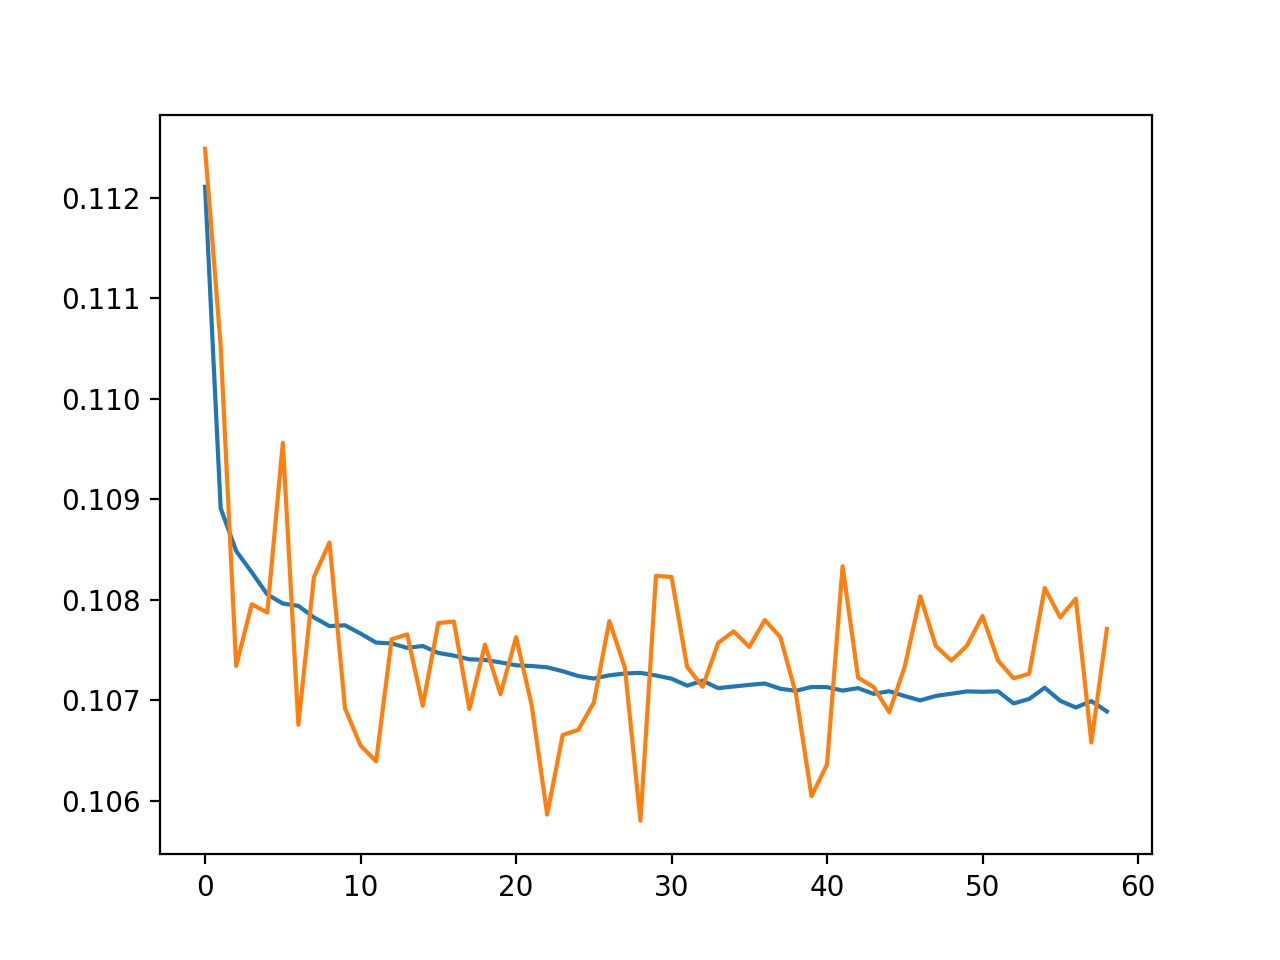

In [34]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])